# Desafío - Gráficos

## Esteban Gonzalez

### 1. Genere una submuestra de casos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
df = pd.read_csv('qog_std_cs_jan18.csv')

In [2]:
df2= df.copy()

In [3]:
df2['region_codificada']= df2['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],
    ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem',
    'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'])

In [4]:
sample_am= df2.sample(frac=0.5, random_state=2496)

In [5]:
sample_am.shape

(97, 1883)

In [6]:
subset_sample_am = sample_am.loc[:,['cname', 'undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', ' imf_pop',
                             'ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners', 'region_codificada']]

C:\Users\egonz\Anaconda3\Anaconda3.2\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [7]:
subset_sample_am.shape

(97, 11)

# 2. Genere una función que ingrese su objeto y devuelva:
Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos
contínuos

Para cada variable discreta, que calcule la frecuencia.

Reporte las estadísticas descriptivas para gle_cgdpc , undp_hdi , imf_pop .

Compare las estadísticas con algún compañero. ¿Ve alguna diferencia substancial en alguna
de ellas?


In [8]:
def clasifica_variables(x):   
    for i,v in x.iteritems():
        if v.dtype== 'int64':
            print(v.describe().round(2))
        elif v.dtype== 'float64':
            print(v.describe().round(2))
        elif v.dtype== 'object':
            print(v.value_counts())
    

In [9]:
x = subset_sample_am.loc[:,['gle_cgdpc' ,'undp_hdi' ,'imf_pop']]
clasifica_variables(x)



# al comparar la funcion arroja resultaodos similares

count       96.00
mean     13173.87
std      13515.28
min        332.27
25%       2989.37
50%       9289.48
75%      17614.97
max      64342.71
Name: gle_cgdpc, dtype: float64
count    94.00
mean      0.70
std       0.15
min       0.35
25%       0.59
50%       0.73
75%       0.80
max       0.94
Name: undp_hdi, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: imf_pop, dtype: float64


### 3. Genere una función que liste las observaciones perdidas de una variable

### La función debe contener los siguientes argumentos:
dataframe : La función debe ingresar un objeto DataFrame.

var : Variable a inspeccionar.

print_list : Opción para imprimir la lista de observaciones perdidas en la variable.

Debe ser False por defecto.

La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.

Cuando print_list = True , debe retornar la lista de casos.

Analice todas las variables y sus casos perdidos.

Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con
ausencia de datos.


In [10]:
def perdidas(dataframe, var, print_list = False):
    
    cantidad_perdidos = dataframe[var].isnull().value_counts().get(True)
    porcentaje_perdidos = dataframe[var].isnull().value_counts('%').get(True) 
    df_trabajo = dataframe[var]
    if cantidad_perdidos == None:
        cantidad_perdidos =0
    if porcentaje_perdidos == None:
        cantidad_perdidos =0
    
    print('la cantidad de casos perdidos es de :',cantidad_perdidos)
    print('su porcentaje es de: ',porcentaje_perdidos)
    
    df_temporal= dataframe[df_trabajo.isnull()]['cname']
    
    if print_list is True:
        print(df_temporal) 

In [11]:
perdidas(subset_sample_am,'undp_hdi', True)

la cantidad de casos perdidos es de : 3
su porcentaje es de:  0.030927835051546393
89     Korea, North
37           Taiwan
148      San Marino
Name: cname, dtype: object


### 4. Grafique los histogramas
Genere una función que grafique un histograma en conjunto y señale las medias.
La función debe incluír los siguientes argumentos:
dataframe : La base de datos donde se encuentran los datos específicos.
var : La variable a graficar.
sample_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la
media de la variable en la selección muestral. Por defecto debe ser False .
true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la
media de variable en la base de datos completa.
Implemente las funciones para las 4 variables seleccionadas según su grupo.
¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

In [12]:
def grafico_histograma (dataframe, var, sample_min =False, true_min= False):
    plt.hist(dataframe[var].dropna())
    
    if sample_min == True:
        plt.axvline(dataframe[var].mean(), lw=3, color= 'tomato', linestyle='--')
    if true_min== True:
        plt.axvline(df[var].mean(), lw=3, color= 'dodgerblue', linestyle='--')

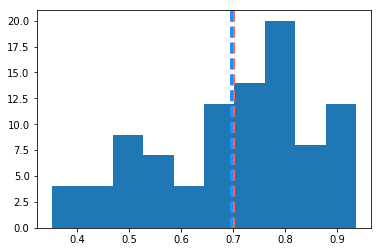

In [13]:
grafico_histograma(subset_sample_am, 'undp_hdi', True, True)

In [14]:
''' 
 usar la funcion en estas 4 variables:
 
ffp_hf : Human Flight and Brain Drain
wef_qes : Quality of the educational system
wdi_expedu : Government expenditure on education, total (% of GDP)
wdi_ners : School enrollment, secondary (% net)'''

' \n usar la funcion en estas 4 variables:\n \nffp_hf : Human Flight and Brain Drain\nwef_qes : Quality of the educational system\nwdi_expedu : Government expenditure on education, total (% of GDP)\nwdi_ners : School enrollment, secondary (% net)'

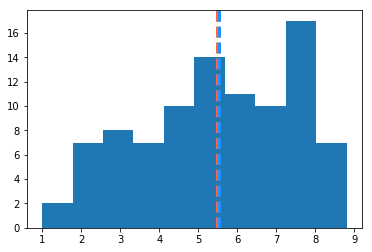

In [15]:
grafico_histograma(subset_sample_am, 'ffp_hf', True, True)

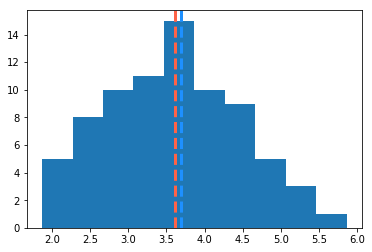

In [16]:
grafico_histograma(subset_sample_am, 'wef_qes', True, True)

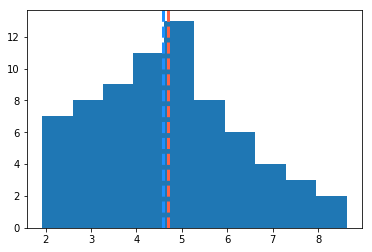

In [17]:
grafico_histograma(subset_sample_am, 'wdi_expedu', True, True)

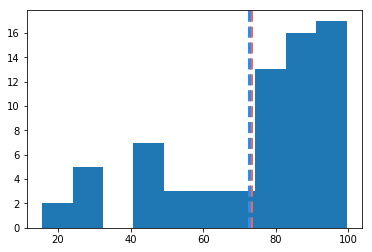

In [18]:
grafico_histograma(subset_sample_am, 'wdi_ners', True, True)

In [19]:
# la submuestra es mayor en la media de las variables: undp_hdi, wdi_expedu, wdi_ners

### 5. Genere una función que devuelva un dotplot
La función debe contener los siguientes argumentos como argumentos:
dataframe : La tabla de datos donde buscar las variables.
plot_var : La variable a analizar y extraer las medias.
plot_by : La variable agrupadora.
global_stat : Booleano. Si es True debe graficar la media global de la variable. Por
defecto debe ser False .
statistic: Debe presentar dos opciones. mean para la media y median para la mediana.
Por defecto debe ser mean .
Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

In [20]:
def dotplot(dataframe, plot_var, plot_by, global_stat=False, statistic= 'mean'):
    data_frame_mean= round(dataframe.groupby(plot_by)[plot_var].mean(),2)
    data_frame_median= round(dataframe.groupby(plot_by)[plot_var].median(),2)
    data_frame_media_global= dataframe[plot_var].mean()
    
    if global_stat==True:
        plt.axvline(dataframe[plot_var].mean(), lw=3, color= 'tomato', linestyle='--')
        
    if statistic == 'mean':
        plt.plot(data_frame_mean.values, data_frame_mean.index, 'o', color = 'red')
    elif statistic =='median':
        plt.plot(data_frame_median.values, data_frame_median.index, 'o', color = 'red')   

In [21]:
nombre_columna=[]
contador_na=[]
for colnames, serie in subset_sample_am.iteritems():
    nombre_columna.append(colnames)
    contador_na.append(serie.isna().value_counts().get(True))
    
df_temporal2= pd.DataFrame(
    {'variable': nombre_columna,
     'perdidos': contador_na })

df_temporal2.sort_values(by='perdidos')
    

,variable,perdidos
4,gle_cgdpc,1.0
1,undp_hdi,3.0
6,ffp_hf,4.0
7,wef_qes,20.0
8,wdi_expedu,26.0
9,wdi_ners,28.0
5,imf_pop,97.0
0,cname,NaN
2,ccodealp,NaN
3,ht_region,NaN


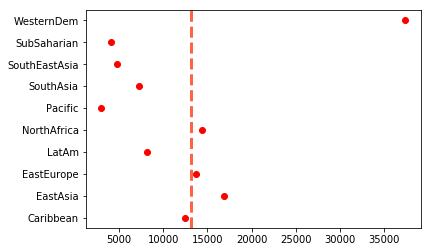

In [22]:
dotplot(subset_sample_am, 'gle_cgdpc', 'region_codificada', True, 'mean' )

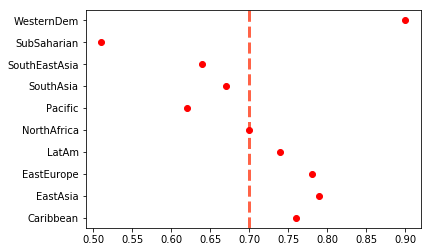

In [23]:
dotplot(subset_sample_am, 'undp_hdi', 'region_codificada', True, 'mean' )

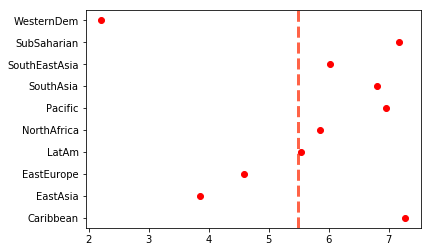

In [24]:
dotplot(subset_sample_am, 'ffp_hf', 'region_codificada', True, 'mean' )

### 6. Guarde la base de datos
La submuestra creada tiene un método llamado to_csv .
Acceda a éste y guarde la base de datos con la siguiente nomenclatura:
subsample_<iniciales>_demo.csv .
(Súbala a la plataforma, junto al desafío)

In [25]:
subset_sample_am.to_csv('subsample_eaga_demo.csv')